C:\Users\samra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\samra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\samra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\samra\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

            Scaler      Algorithm Clusters  Silhouette        DB          CH
0   StandardScaler         KMeans        2    0.581750  0.593313  251.349339
1   StandardScaler  Agglomerative        2    0.577035  0.591656  240.245665
2   StandardScaler         KMeans        3    0.479881  0.789363  157.360153
3   StandardScaler  Agglomerative        3    0.446689  0.803467  222.719164
4   StandardScaler         KMeans        4    0.385045  0.869779  206.680603
5   StandardScaler  Agglomerative        4    0.400636  0.978821  201.251454
6   StandardScaler         KMeans        5    0.345033  0.943894  202.635850
7   StandardScaler  Agglomerative        5    0.330587  0.974249  192.681283
8   StandardScaler         DBSCAN      N/A    0.356516  7.124057   84.510330
9     MinMaxScaler         KMeans        2    0.630047  0.486167  354.365556
10    MinMaxScaler  Agglomerative        2    0.630047  0.486167  354.365556
11    MinMaxScaler         KMeans        3    0.482929  0.786733  351.295064

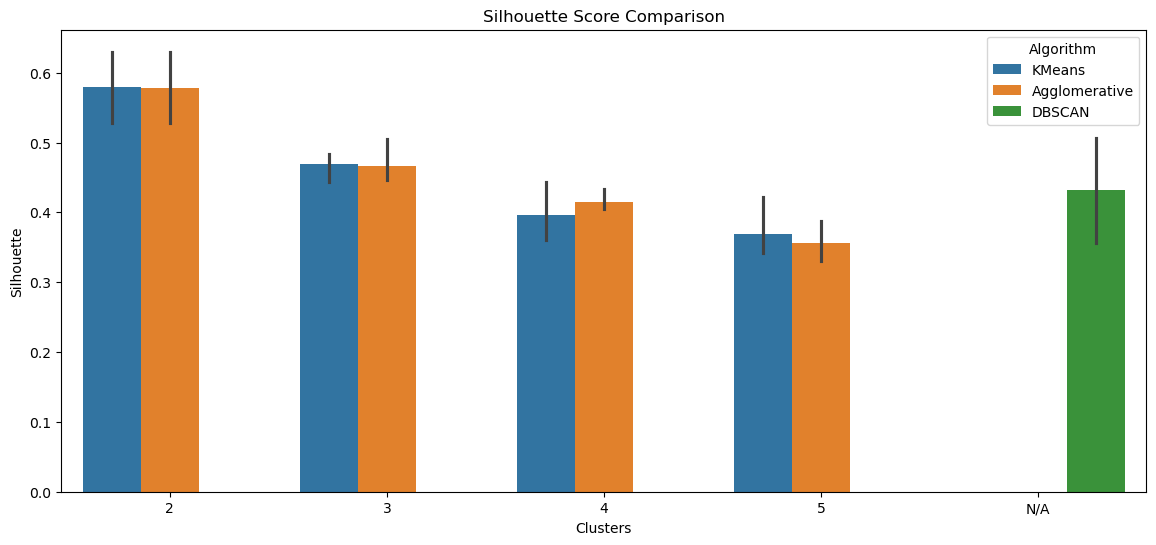

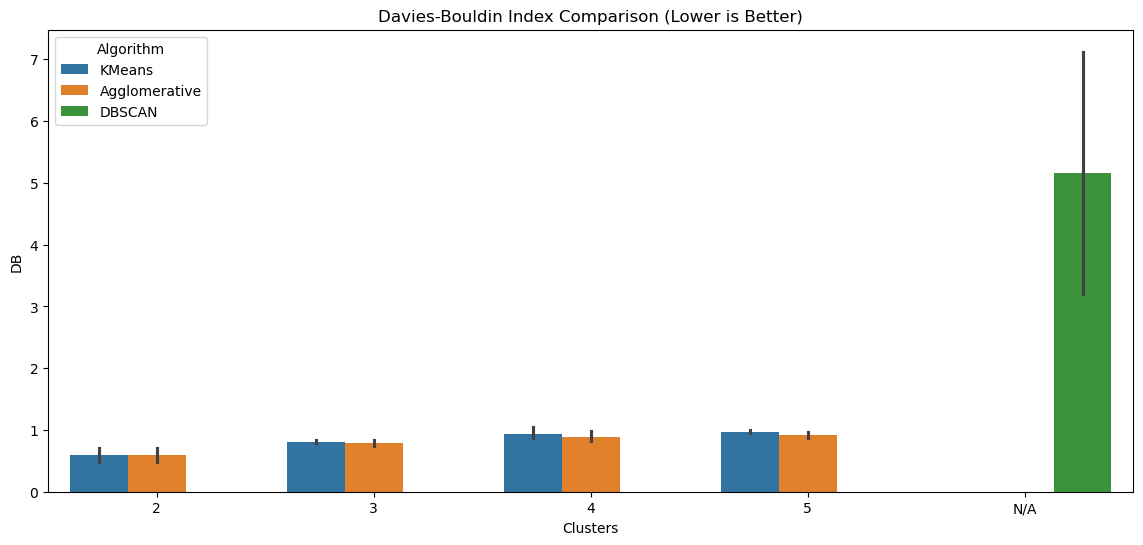

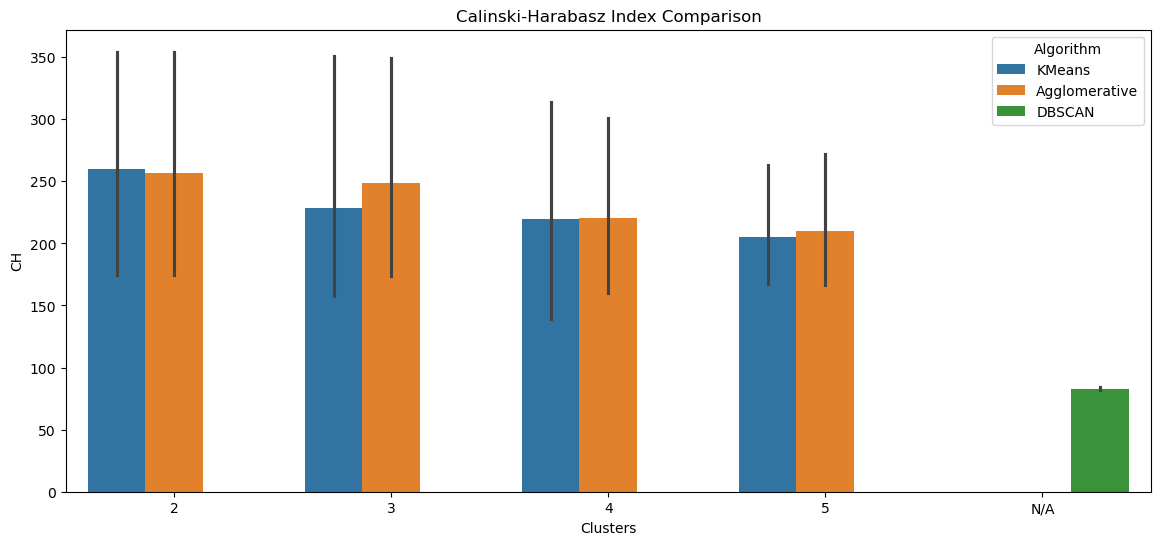

In [1]:
# Comparative Study of Clustering Algorithms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

# Load dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Preprocessing methods
preprocessors = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

# Clustering algorithms
def run_clustering(X_scaled, n_clusters):
    results = []

    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels_kmeans = kmeans.fit_predict(X_scaled)
    results.append(("KMeans", labels_kmeans))

    # Agglomerative
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    labels_agg = agg.fit_predict(X_scaled)
    results.append(("Agglomerative", labels_agg))

    return results

# DBSCAN with fixed parameters (doesn’t need n_clusters)
def run_dbscan(X_scaled):
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    labels_db = dbscan.fit_predict(X_scaled)
    return ("DBSCAN", labels_db)

# Evaluation metrics
def evaluate(labels, X_scaled):
    if len(set(labels)) <= 1 or (len(set(labels)) == len(labels)):  # avoid single cluster or all different
        return {"Silhouette": np.nan, "DB": np.nan, "CH": np.nan}
    
    return {
        "Silhouette": silhouette_score(X_scaled, labels),
        "DB": davies_bouldin_score(X_scaled, labels),
        "CH": calinski_harabasz_score(X_scaled, labels)
    }

# Main loop
final_results = []

for scaler_name, scaler in preprocessors.items():
    X_scaled = scaler.fit_transform(X)
    
    for n_clusters in [2, 3, 4, 5]:
        clustering_results = run_clustering(X_scaled, n_clusters)
        
        for algo_name, labels in clustering_results:
            metrics = evaluate(labels, X_scaled)
            final_results.append({
                "Scaler": scaler_name,
                "Algorithm": algo_name,
                "Clusters": n_clusters,
                **metrics
            })

    # DBSCAN (cluster count not needed)
    algo_name, labels = run_dbscan(X_scaled)
    metrics = evaluate(labels, X_scaled)
    final_results.append({
        "Scaler": scaler_name,
        "Algorithm": algo_name,
        "Clusters": "N/A",
        **metrics
    })

# Create a dataframe for results
results_df = pd.DataFrame(final_results)
print(results_df)

# Visualization
plt.figure(figsize=(14, 6))
sns.barplot(data=results_df.dropna(), x="Clusters", y="Silhouette", hue="Algorithm")
plt.title("Silhouette Score Comparison")
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(data=results_df.dropna(), x="Clusters", y="DB", hue="Algorithm")
plt.title("Davies-Bouldin Index Comparison (Lower is Better)")
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(data=results_df.dropna(), x="Clusters", y="CH", hue="Algorithm")
plt.title("Calinski-Harabasz Index Comparison")
plt.show()
